In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
basedir = '/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/mcs_env_cond_reviews/ecape/2020/??/01/full/'
ds = xr.open_mfdataset(basedir + 'ecmwf-era5_oper_an_ml_2020??01????.ecape.nc')


In [3]:
time = pd.DatetimeIndex(ds.time)

In [4]:
from collections import Counter
Counter(time.month.values)

Counter({1: 24})

In [5]:
# ds.load()

<xarray.Dataset>
Dimensions:     (time: 24, latitude: 481, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:00:00
  * latitude    (latitude) float32 60.0 59.75 59.5 59.25 ... -59.5 -59.75 -60.0
  * longitude   (longitude) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    CAPE        (time, latitude, longitude) float64 0.09975 0.1412 ... 0.09394
    CIN         (time, latitude, longitude) float64 -8.342e-06 0.0 ... 0.0
    LFC         (time, latitude, longitude) float64 21.28 10.79 ... 20.16 9.51
    EL          (time, latitude, longitude) float64 157.4 157.7 ... 184.4 150.4
    NCAPE       (time, latitude, longitude) float64 7.996 13.03 ... 10.09 6.494
    V_SR        (time, latitude, longitude) float64 9.269 9.182 ... 7.937 7.918
    Etilde      (time, latitude, longitude) float64 404.4 269.2 ... 257.9 310.6
    varepsilon  (time, latitude, longitude) float64 0.006409 ... 0.006958
    radius      (time, latitude, longitude) float64 142.2 145.4 ... 169.4 136.5
    ECAPE       (time, latitude, longitude) float64 40.34 38.0 ... 28.61 29.18
Attributes: (12/35)
    ECAPE param L_m:            120
    ECAPE param RA_filter_fac:  0.9
    ECAPE param T1:             273.15
    ECAPE param T2:             253.15
    ECAPE param alpha:          0.8
    ECAPE param sigma:          1.1
    ...                         ...
    task doc:                   None
    created on:                 2024-07-12 18:43:31.690715
    nodename:                   host586.jc.rl.ac.uk
    hostname:                   jasmin
    output path:                /gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime...
    contact:                    mark.muetzelfeldt@reading.ac.uk

In [6]:
dkeys = list(ds.data_vars.keys())

/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_7678/3802800706.py:5: RuntimeWarning: Mean 

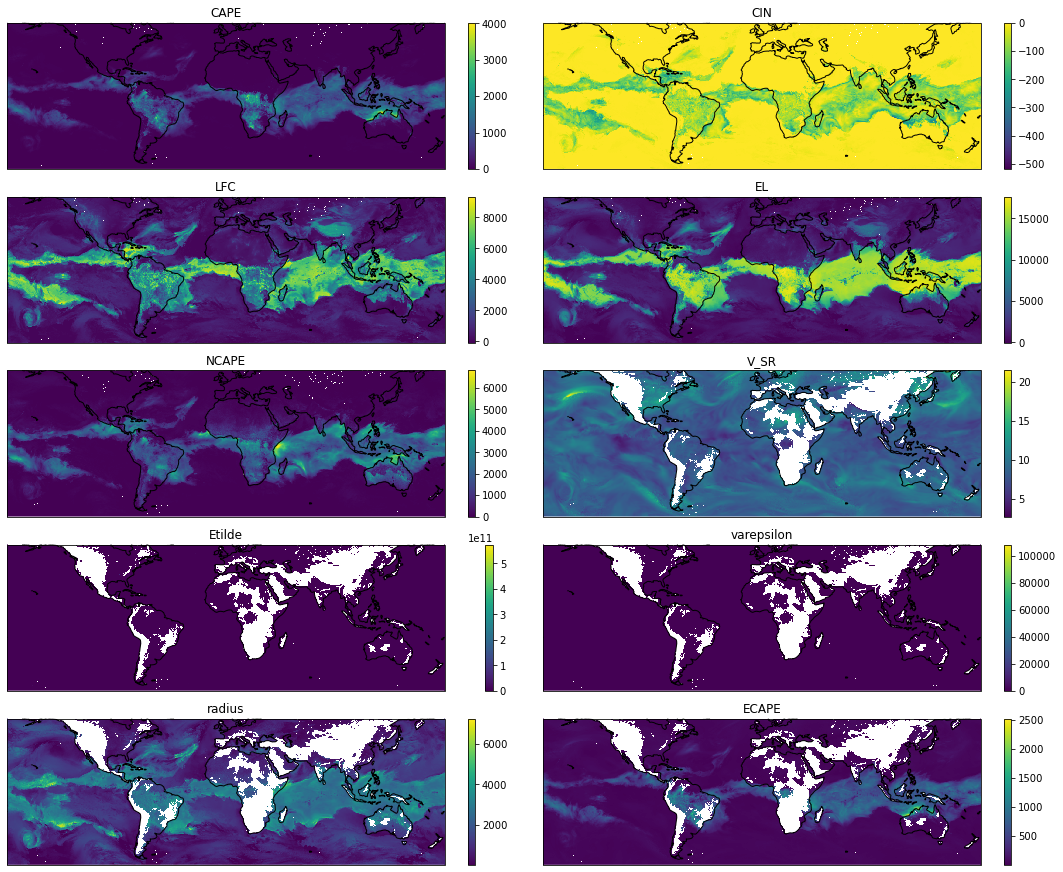

In [7]:
fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, layout='constrained', subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(15, 12)
for i, (key, ax) in enumerate(zip(dkeys, axes.flatten())):
    ax.set_title(key)
    im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
    plt.colorbar(im, ax=ax)
    ax.coastlines()

In [4]:
from scipy.stats import linregress
import seaborn as sns
from matplotlib.colors import LogNorm

In [5]:
cape = ds.CAPE.values.flatten()
ecape = ds.ECAPE.values.flatten()
cape = cape[~np.isnan(ecape)]
ecape = ecape[~np.isnan(ecape)]

lr = linregress(cape, ecape)
x = np.array([cape.min(), cape.max()])
y = lr.slope * x + lr.intercept

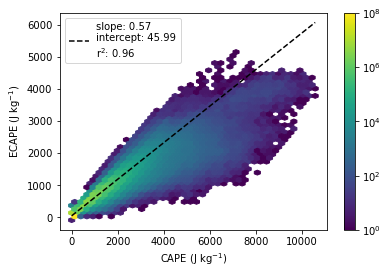

In [6]:
im = plt.hexbin(cape, ecape, norm=LogNorm(), gridsize=40)
plt.colorbar(im)
plt.plot(x, y, 'k--', label=f'slope: {lr.slope:.2f}\nintercept: {lr.intercept:.2f}\nr$^2$: {lr.rvalue**2:.2f}')
plt.xlabel('CAPE (J kg$^{-1}$)')
plt.ylabel('ECAPE (J kg$^{-1}$)')
plt.legend()

In [ ]:
sns.scatterplot(x=cape, y=ecape)
# sns.jointplot(x=df.CAPE, y=df.ECAPE, kind="hex", norm=LogNorm())

plt.plot(x, y, 'k--', label=f'slope: {lr.slope:.2f}\nintercept: {lr.intercept:.2f}\nr$^2$: {lr.rvalue**2:.2f}')
plt.xlabel('CAPE (J kg$^{-1}$)')
plt.ylabel('ECAPE (J kg$^{-1}$)')
plt.legend()